# Gradient Ascentfor Bring Home Water
This small notebook shows how to run the basic gradient ascent stochastic ascent on the Bring Home Water problem.


In [13]:
%matplotlib inline
import gd
import matplotlib.pyplot as plt

## Parameters to play with
Below i have listed the parameters to play with
- T is duration to consider
- N is number of steps to do
- hamiltonian_grid_size: the size of the grid used to discretize the hamiltonian operator - large means more accurate but slower algorithm - but we set it small here because the algorithm becomes very slow
- A amplitude of controllable tweezer
- B amplitude of fixed tweezer
- superposition - try to move atom to superposition

We have fixed some standard value below and run the stochastic ascent algorithm that prints out what it is doing.
We have on purpose used smaller hamiltonian_grid_size compared to the experiments in the note because it speeds everything up and works well enough.
In the follwing cell we run the stochastic ascent algorithm with these parameters. 

In [8]:
T = 0.2
N = 80
hamiltonian_grid_size = 32
A = 160
B = 130
fix_start = True
superposition = None
params = {'T': T, 'N': N, 'hamiltonian_grid_size': hamiltonian_grid_size, 
          'Alpha': A, 'Beta': B,  'superposition': superposition}
rounds = 100
lr = 0.05

## Uniform initalization 
We run only 100 steps of gradient ascent with a poor value chosen for discretation of the hamiltonian. Otherwise our patience runs thin in a simple proof of concept.
Every run may give very different results and do not expect to much from this small run.

In [9]:
start_protocol = gd.uniform_init(N, -1, 1)
fid_uni, prot_uni, hist_uni = gd.run(params, lr=lr, rounds=rounds, start_protocol=start_protocol)

random init
Time Per Step is: 0.0025
starting loss 0.9979360787762237 fid 0.0020639212237762994
round 0: fidel 0.0020639212237762994, grad_norm 0.05771577422677958
--- updating best ---  0.004665977313719649
round 1: fidel 0.004665977313719649, grad_norm 0.08064054034780392
--- updating best ---  0.008242210377480519
round 2: fidel 0.008242210377480519, grad_norm 0.1079485791543354
--- updating best ---  0.012000965620705628
round 3: fidel 0.012000965620705628, grad_norm 0.12877011470795177
--- updating best ---  0.01581577395902145
round 4: fidel 0.01581577395902145, grad_norm 0.14441102558710905
--- updating best ---  0.01965375219843657
round 5: fidel 0.01965375219843657, grad_norm 0.15710155840364134
--- updating best ---  0.023471735207784006
round 6: fidel 0.023471735207784006, grad_norm 0.16681874351932968
--- updating best ---  0.027313873244771858
round 7: fidel 0.027313873244771858, grad_norm 0.17606607978580502
--- updating best ---  0.03128803942514147
round 8: fidel 0.0312

--- updating best ---  0.1726330284384504
round 75: fidel 0.1726330284384504, grad_norm 0.11226320691511173
--- updating best ---  0.17349141965007087
round 76: fidel 0.17349141965007087, grad_norm 0.11786356785534338
--- updating best ---  0.17426371044651134
round 77: fidel 0.17426371044651134, grad_norm 0.1253623790334754
--- updating best ---  0.17515551698201637
round 78: fidel 0.17515551698201637, grad_norm 0.1277432829127728
--- updating best ---  0.17604548563821842
round 79: fidel 0.17604548563821842, grad_norm 0.13373196088493053
--- updating best ---  0.17712154395577195
round 80: fidel 0.17712154395577195, grad_norm 0.13556863485281348
--- updating best ---  0.17875337730933438
round 81: fidel 0.17875337730933438, grad_norm 0.1349281512028391
--- updating best ---  0.17912230921057037
round 82: fidel 0.17912230921057037, grad_norm 0.15534794835719914
--- updating best ---  0.18130786137542287
round 83: fidel 0.18130786137542287, grad_norm 0.14940008703452823
--- updating be

## Lets plot the protocol and see what it looks like
It is usually not pretty.

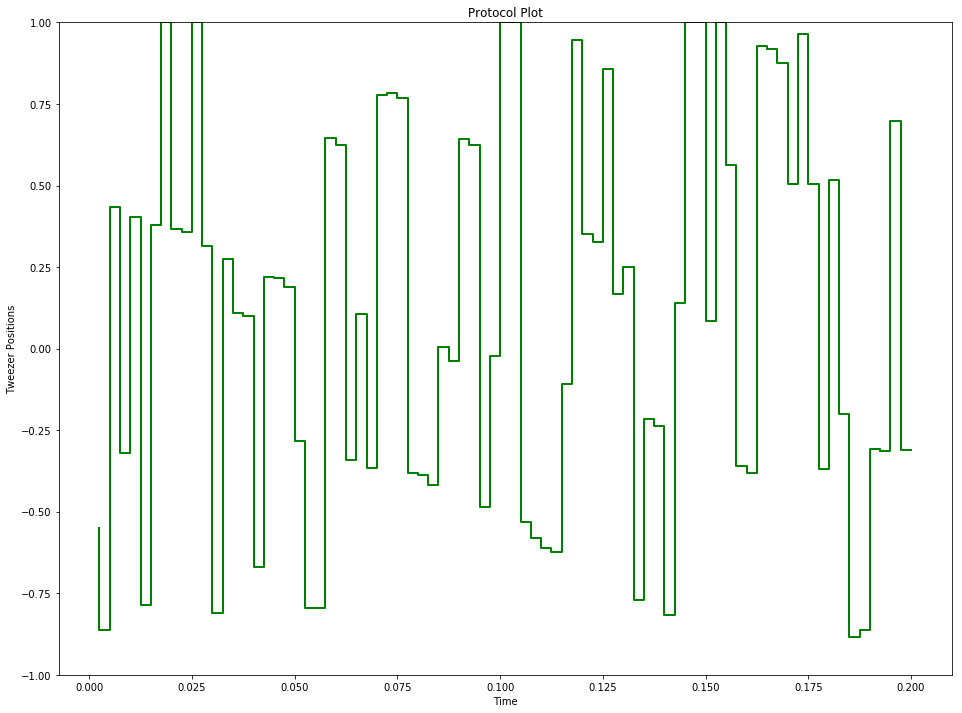

In [14]:
gd.plot_protocol(prot_uni, t=params['T'])
plt.show()

## Better Initialization
Starting from the zero vector or simple linear motion instead


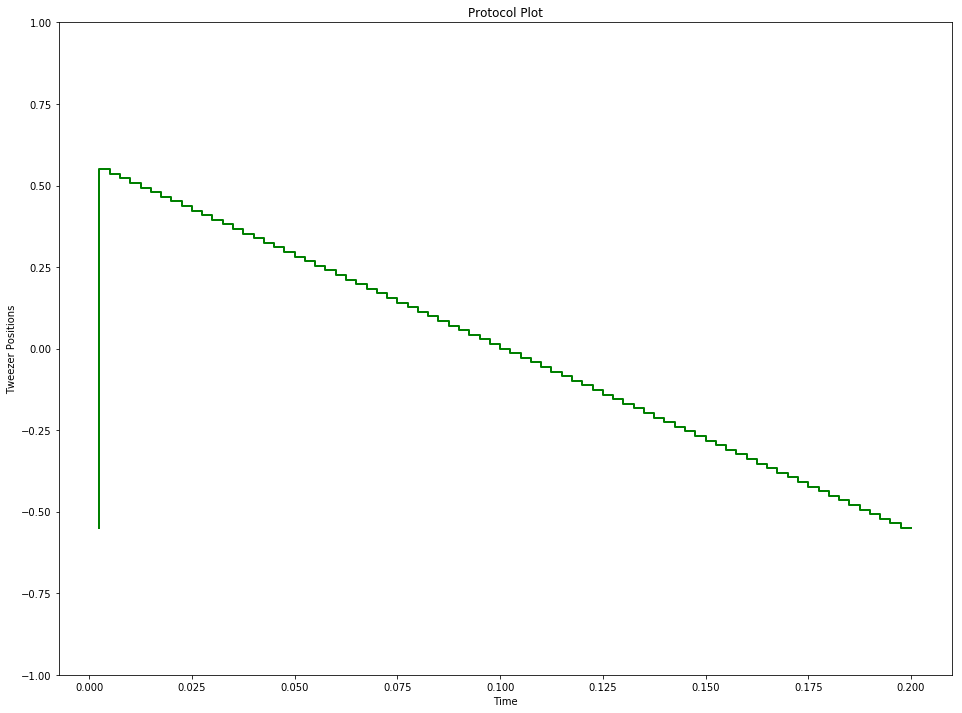

In [29]:
import numpy as np
# protocol is x_n,...,x_1 i.e. last value is first step and first value is last step
line_protocol = np.array(list(np.linspace(-0.55, 0.55, N-1)) + [-0.55]).reshape(-1, 1)
gd.plot_protocol(line_protocol, T)
plt.show()

Time Per Step is: 0.0025
starting loss 0.45529425338518315 fid 0.5447057466148169
round 0: fidel 0.5447057466148169, grad_norm 5.397087056736725
--- updating best ---  0.8616680143623635
round 1: fidel 0.8616680143623635, grad_norm 2.4355797074325856
--- updating best ---  0.8830525767486653
round 2: fidel 0.8830525767486653, grad_norm 2.163959255204731
--- updating best ---  0.906916402517901
round 3: fidel 0.906916402517901, grad_norm 1.8776528090933264
--- updating best ---  0.9119468704356677
round 4: fidel 0.9119468704356677, grad_norm 1.9641735110666396
--- updating best ---  0.9247954588384582
round 5: fidel 0.9247954588384582, grad_norm 1.7459012928925173
--- updating best ---  0.9282971875047048
round 6: fidel 0.9282971875047048, grad_norm 1.7719101646580209
--- updating best ---  0.9362243522430346
round 7: fidel 0.9362243522430346, grad_norm 1.6720148672382174
--- updating best ---  0.9372694881424349
round 8: fidel 0.9372694881424349, grad_norm 1.7000613223096366
--- updati

round 97: fidel 0.9901125502202345, grad_norm 0.41649516894311417
round 98: fidel 0.9897968799408405, grad_norm 0.4958024617887145
--- updating best ---  0.9902974084216909
round 99: fidel 0.9902974084216909, grad_norm 0.40000696542334446
norm diff start, end 0.22594151116906033
best fidelity: 0.9902974084216909 0.9902974084216909
max min of best -0.55 0.5965569012607771
loss of best_prot returned 0.9902974084216909


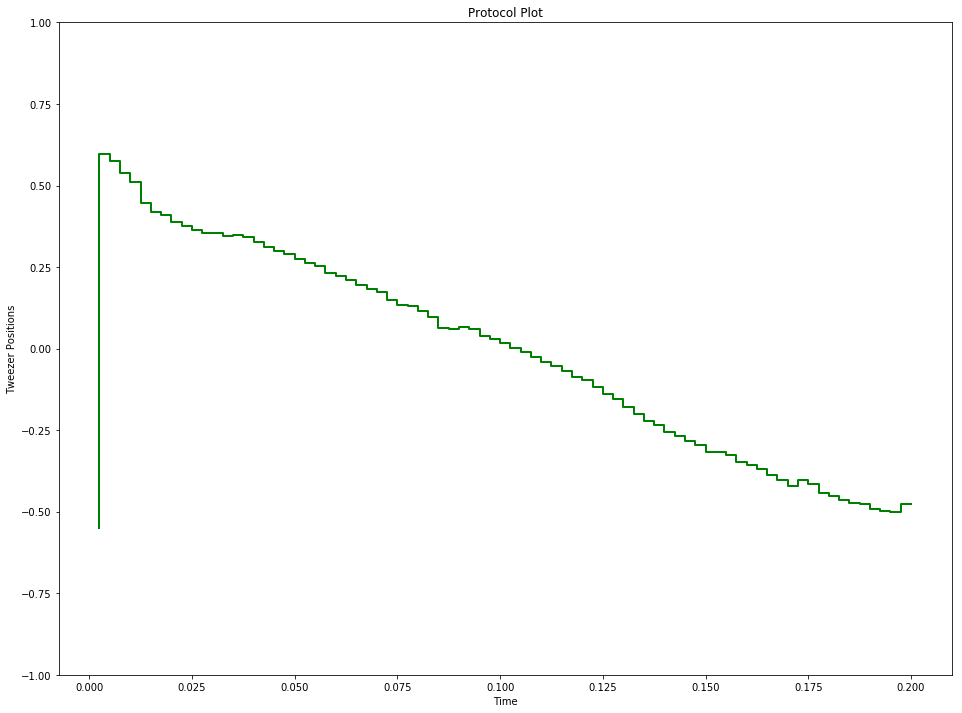

In [32]:
fid_lin, prot_lin, hist_lin = gd.run(params, lr=lr, rounds=100, start_protocol=line_protocol)
gd.plot_protocol(prot_lin, T)
plt.show()

# Another Initiliaztion - Tweezer in the middle/The zero vector

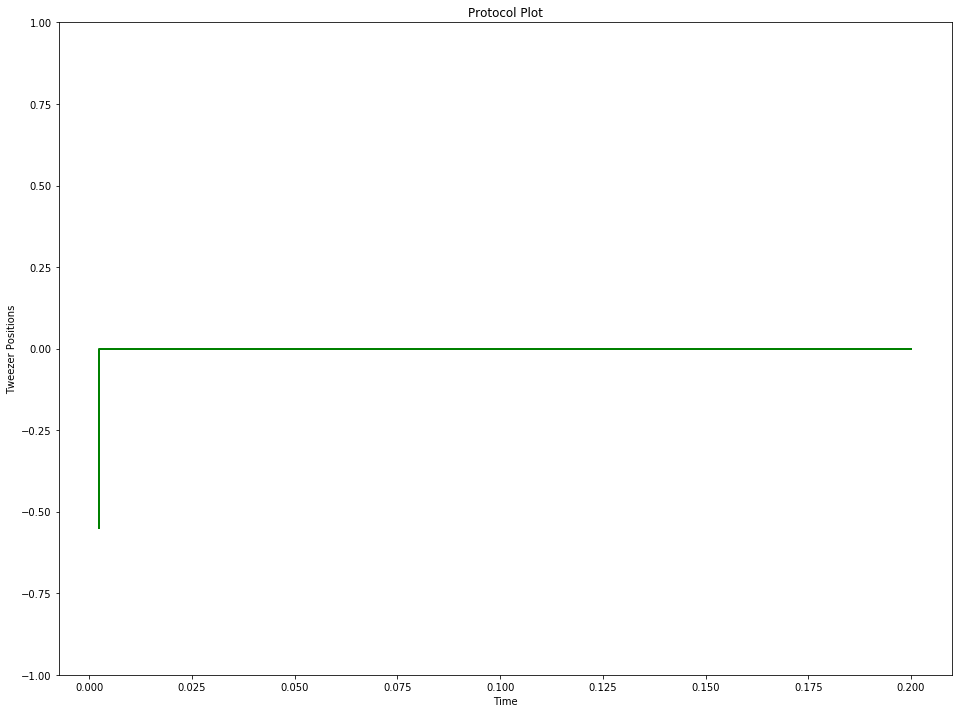

In [33]:
# protocol is x_n,...,x_1 i.e. last value is first step and first value is last step
zero_protocol = np.zeros((N, 1))
zero_protocol[-1] = -0.55
gd.plot_protocol(zero_protocol, T)
plt.show()

Time Per Step is: 0.0025
starting loss 0.9999777086701509 fid 2.2291329849100094e-05
round 0: fidel 2.2291329849100094e-05, grad_norm 0.0012593792797839821
--- updating best ---  0.00019565272198895922
round 1: fidel 0.00019565272198895922, grad_norm 0.003723611505749038
--- updating best ---  0.0004333432291274697
round 2: fidel 0.0004333432291274697, grad_norm 0.0055843700372211385
--- updating best ---  0.0007076305241240366
round 3: fidel 0.0007076305241240366, grad_norm 0.007143657061558223
--- updating best ---  0.0010020331619478018
round 4: fidel 0.0010020331619478018, grad_norm 0.008406230017982956
--- updating best ---  0.001303117525411679
round 5: fidel 0.001303117525411679, grad_norm 0.009404982349891969
--- updating best ---  0.0016205022483639642
round 6: fidel 0.0016205022483639642, grad_norm 0.010592194255408726
--- updating best ---  0.0019764896234381046
round 7: fidel 0.0019764896234381046, grad_norm 0.012107519918834523
--- updating best ---  0.002376041984727184
r

round 82: fidel 0.7480599037805614, grad_norm 1.471658180801075
round 83: fidel 0.7514513979425506, grad_norm 1.421972069300568
round 84: fidel 0.7475293717294587, grad_norm 1.4851649310863113
round 85: fidel 0.7509597394787347, grad_norm 1.435420670277268
round 86: fidel 0.7470002714682846, grad_norm 1.4984911774438165
not improving in 20 steps - change learning rate - should really add a lr scheduler...
fix learnign rate by factor 2 - reset params to best 0.005
round 87: fidel 0.7565135121856046, grad_norm 1.2356696038851862
--- updating best ---  0.7697872250800074
round 88: fidel 0.7697872250800074, grad_norm 0.6565943450952367
--- updating best ---  0.7805043945757623
round 89: fidel 0.7805043945757623, grad_norm 0.5445204533022656
--- updating best ---  0.789972419864718
round 90: fidel 0.789972419864718, grad_norm 0.4875544184068769
--- updating best ---  0.7979251259114899
round 91: fidel 0.7979251259114899, grad_norm 0.515707280596223
--- updating best ---  0.8047458676073505


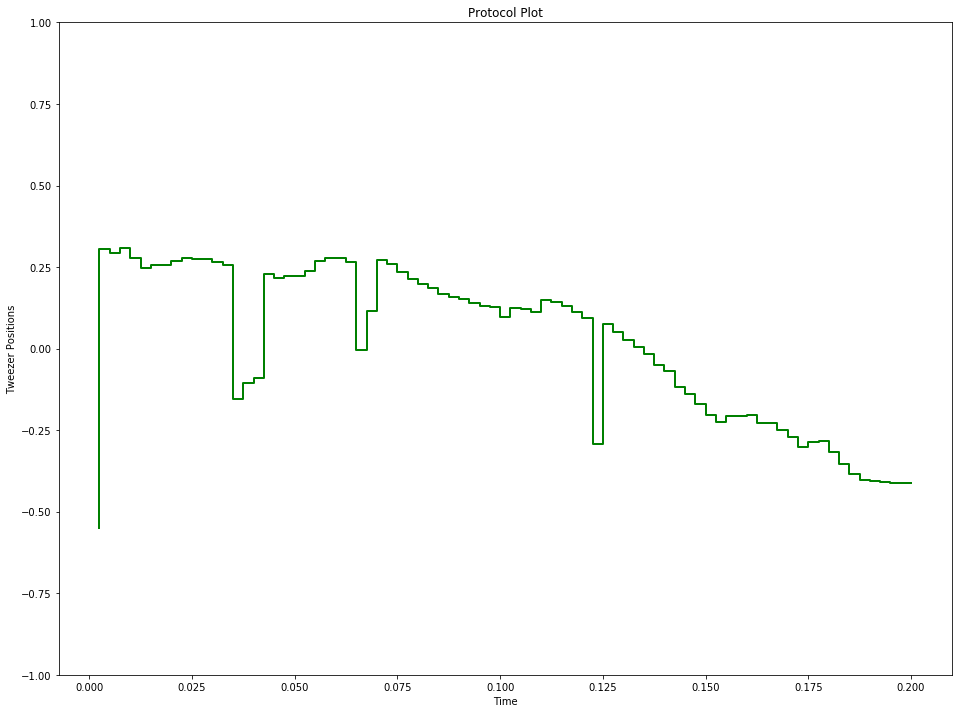

In [34]:
fid_zero, prot_zero, hist_zero = gd.run(params, lr=lr, rounds=100, start_protocol=zero_protocol)
gd.plot_protocol(prot_zero, T)
plt.show()